In [1]:
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

Using TensorFlow backend.
C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\tensorflow\py

In [2]:
def define_discriminator(n_inputs=2):
    model=Sequential()
    model.add(Dense(25,activation='relu',kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [3]:
def define_generator(latent_dim,n_outputs=2):
    model=Sequential()
    model.add(Dense(15,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs,activation='linear'))
    return model

In [4]:
def define_gan(generator,discriminator):
    discriminator.trainable=False
    model=Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy',optimizer='adam')
    return model

In [5]:
def generate_real_samples(n):
    X1=rand(n)-0.5
    X2=X1*X1
    X1=X1.reshape(n,1)
    X2=X2.reshape(n,1)
    X=hstack((X1,X2))
    y=ones((n,1))
    return X,y

In [6]:
def generate_latent_points(latent_dim,n):
    x_input=randn(latent_dim*n)
    x_input=x_input.reshape(n,latent_dim)
    return x_input

In [7]:
def generate_fake_samples(generator,latent_dim,n):
    x_input=generate_latent_points(latent_dim,n)
    X=generator.predict(x_input)
    y=zeros((n,1))
    return X,y

In [8]:
import os
os.chdir('C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\GAN')

In [9]:
def summarize_performance(epoch,generator,discriminator,latent_dim,n=100):
    x_real,y_real=generate_real_samples(n)
    _,acc_real=discriminator.evaluate(x_real,y_real,verbose=0)
    x_fake,y_fake=generate_fake_samples(generator,latent_dim,n)
    _,acc_fake=discriminator.evaluate(x_fake,y_fake,verbose=0)
    print(epoch, acc_real, acc_fake)
    pyplot.scatter(x_real[:,0],x_real[:,1],color='red')
    pyplot.scatter(x_fake[:,0],x_fake[:,1],color='blue')
    pyplot.show()
    f_name=str(epoch)+'.png'
    pyplot.savefig(f_name)

In [10]:
def train(g_model,d_model,gan_model,latent_dim,n_epoches=10000,n_batch=128,n_eval=200):
    half_batch=int(n_batch/2)
    for i in range(n_epoches):
        x_real,y_real=generate_real_samples(half_batch)
        x_fake,y_fake=generate_fake_samples(g_model,latent_dim,half_batch)
        d_model.train_on_batch(x_real,y_real)
        d_model.train_on_batch(x_fake,y_fake)
        x_gan=generate_latent_points(latent_dim,n_batch)
        y_gan=ones((n_batch,1))
        gan_model.train_on_batch(x_gan,y_gan)
        if (i+1)%n_eval==0:
            summarize_performance(i,g_model,d_model,latent_dim)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
199 0.65 0.77


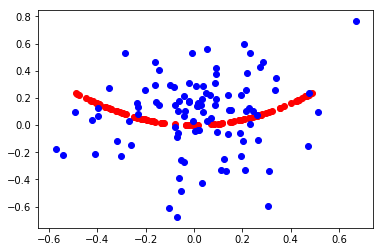

399 0.94 0.35


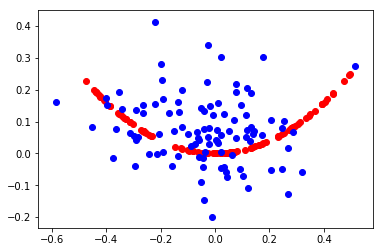

599 0.95 0.25


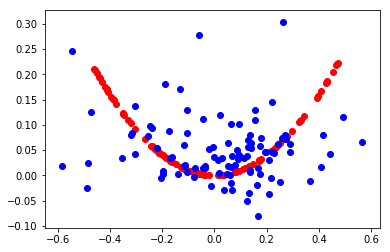

799 0.95 0.33


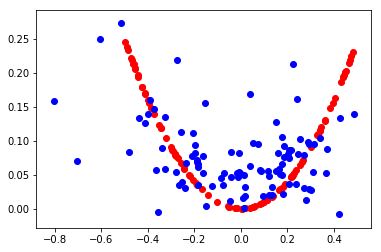

999 0.8 0.45


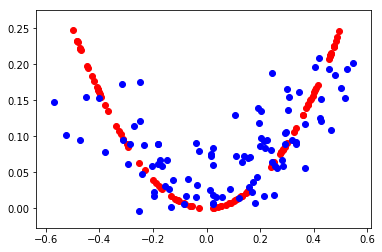

1199 0.61 0.65


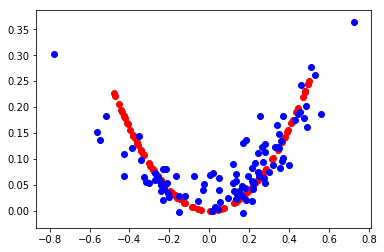

1399 0.47 0.61


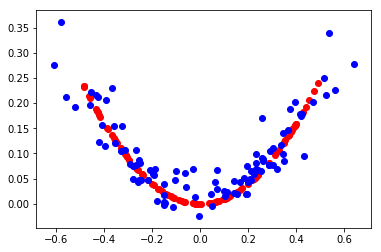

1599 0.46 0.45


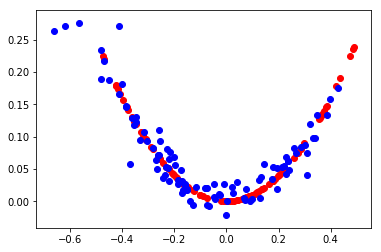

1799 0.67 0.36


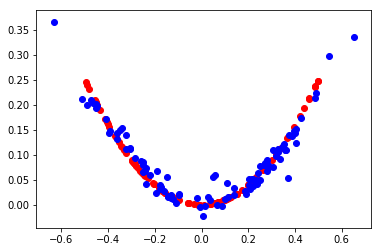

1999 0.68 0.26


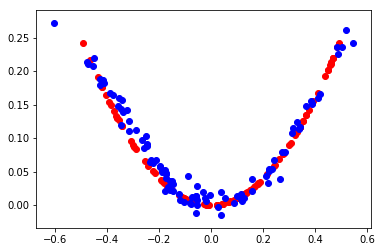

2199 0.7 0.33


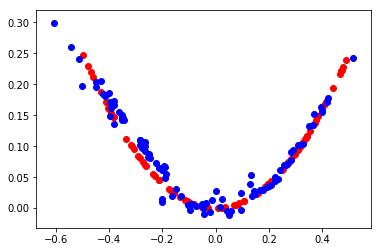

2399 0.79 0.41


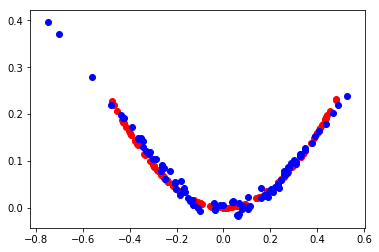

2599 0.6 0.46


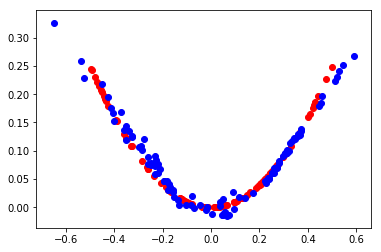

2799 0.41 0.64


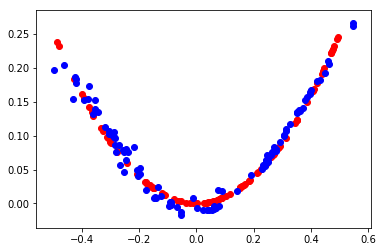

2999 0.68 0.57


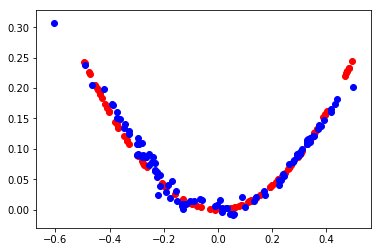

3199 0.64 0.52


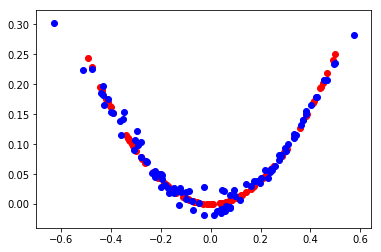

3399 0.68 0.58


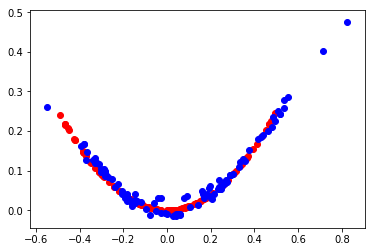

3599 0.68 0.48


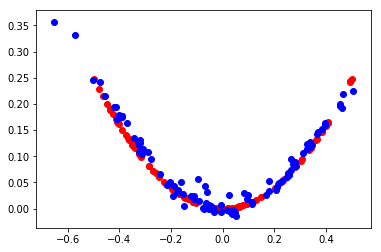

3799 0.79 0.29


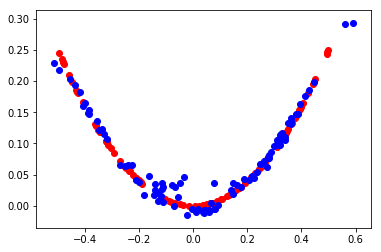

3999 0.59 0.59


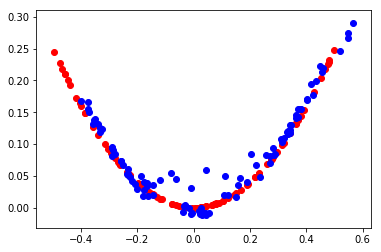

4199 0.7 0.47


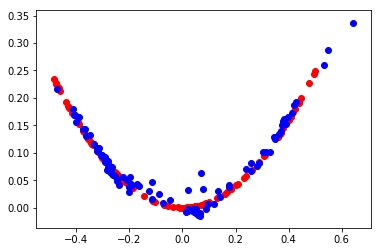

4399 0.71 0.38


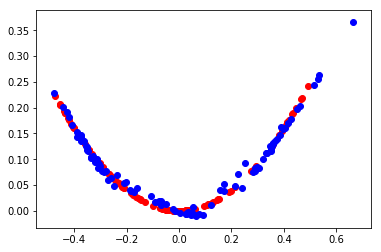

4599 0.66 0.38


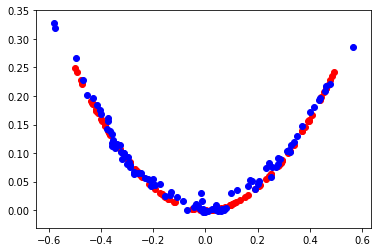

4799 0.65 0.34


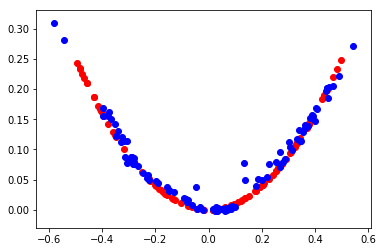

4999 0.8 0.25


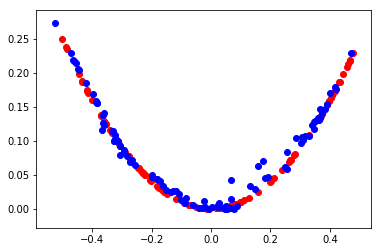

5199 0.63 0.4


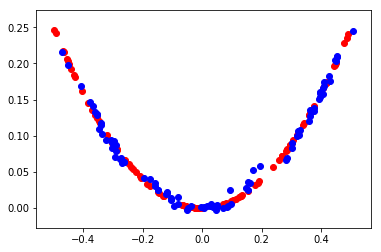

5399 0.84 0.34


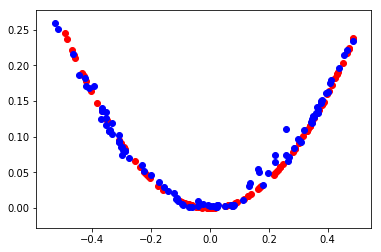

5599 0.82 0.21


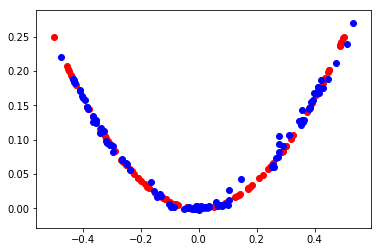

5799 0.69 0.41


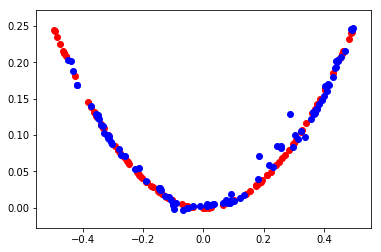

5999 0.5 0.55


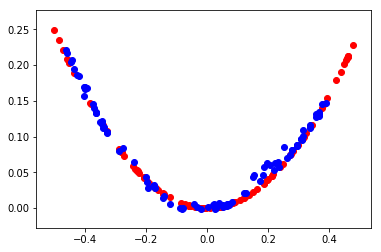

6199 0.84 0.23


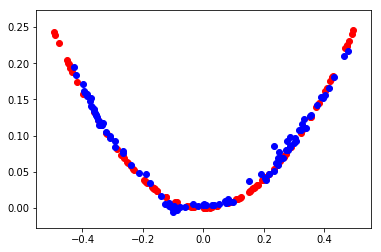

6399 0.66 0.54


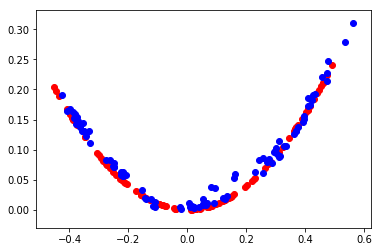

6599 0.5 0.52


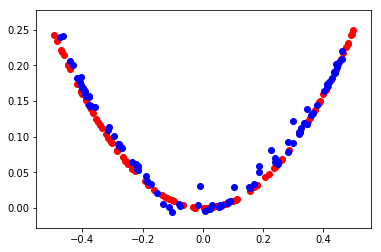

6799 0.58 0.52


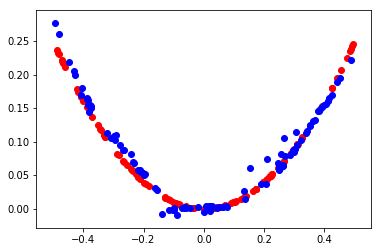

6999 0.66 0.56


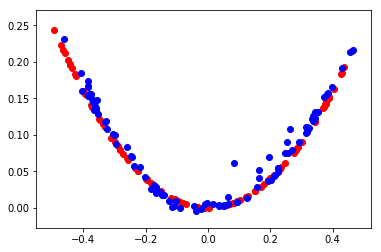

7199 0.56 0.45


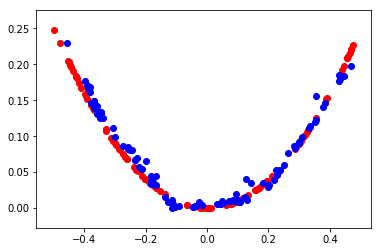

7399 0.7 0.4


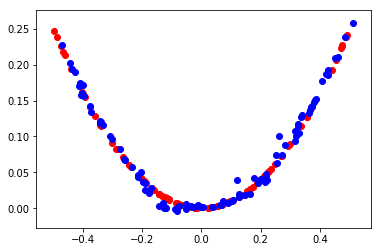

7599 0.74 0.45


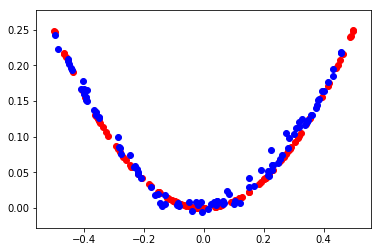

7799 0.96 0.19


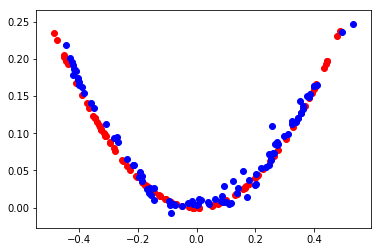

7999 0.68 0.49


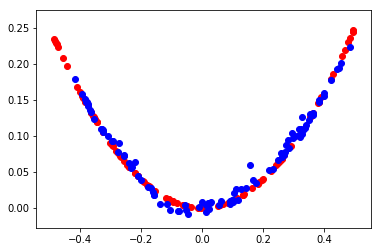

8199 0.59 0.67


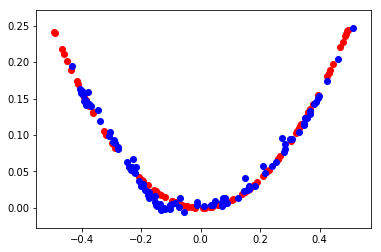

8399 0.73 0.42


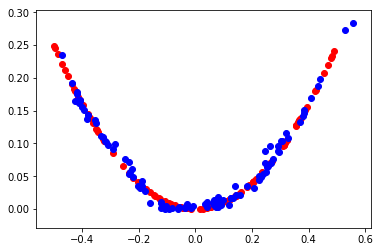

8599 0.64 0.54


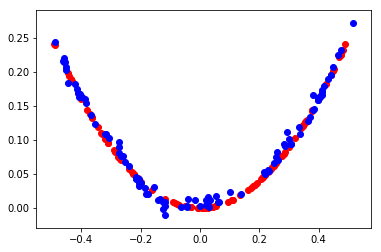

8799 0.53 0.55


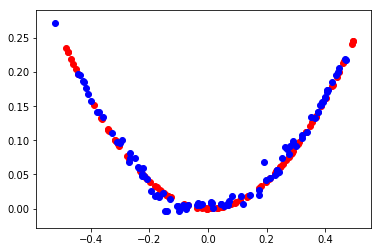

8999 0.57 0.62


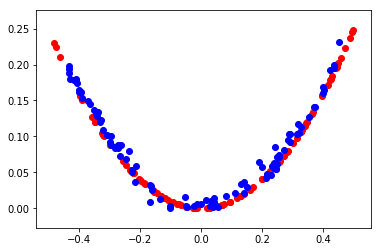

9199 0.48 0.61


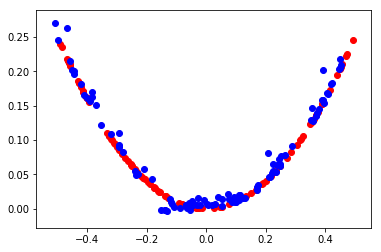

9399 0.64 0.54


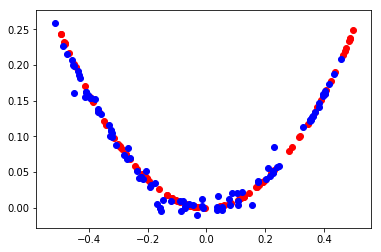

9599 0.61 0.42


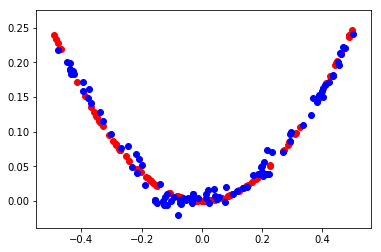

9799 0.47 0.68


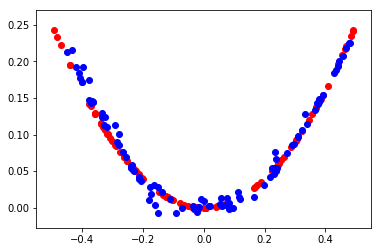

9999 0.57 0.54


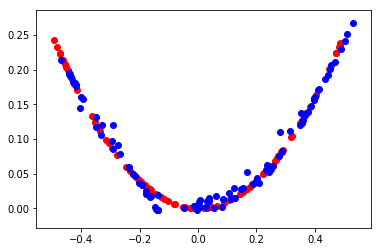

<Figure size 432x288 with 0 Axes>

In [11]:
latent_dim=5
discriminator=define_discriminator()
generator=define_generator(latent_dim)
gan_model=define_gan(generator,discriminator)
train(generator,discriminator,gan_model,latent_dim)

In [36]:
x,y=generate_fake_samples(generator,5,100)

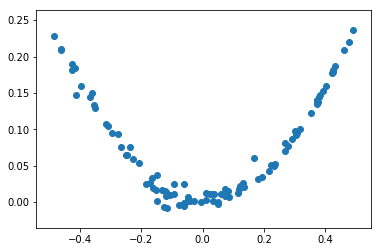

In [37]:
pyplot.scatter(x[:,0],x[:,1])